In [1]:
import numpy as np
import pandas as pd

import random

In [2]:
def rotate_rect_dimensions(length, width, angle_degrees):
    # 将角度转换为弧度
    angle_radians = np.radians(angle_degrees)

    # 计算旋转后的外切矩形的长和宽
    rotated_length = abs(length * np.cos(angle_radians)) + abs(width * np.sin(angle_radians))
    rotated_width = abs(length * np.sin(angle_radians)) + abs(width * np.cos(angle_radians))

    return rotated_length, rotated_width

In [3]:
rotated_length, rotated_width = rotate_rect_dimensions(393, 69, 0)
rotated_length, rotated_width

(393.0, 69.0)

In [4]:
"""
改变量：
长度L：25~400
宽度W: 25~400
周期Px：50~600
周期Py：50~600
旋转角度φ：0~180
"""

'\n改变量：\n长度L：25~400\n宽度W: 25~400\n周期Px：50~600\n周期Py：50~600\n旋转角度φ：0~180\n'

In [5]:
import pandas as pd
import random

# Set the random seed for reproducibility
random.seed(42)

# Number of data points
num_data_points = 5000000


# Number of segments for each variable
num_segments = 10

# Define the ranges for each parameter
L_range = (25, 400)
W_range = (25, 400)
phi_range = (0, 180)
px_range = (50, 600)
py_range = (50, 600)

# Generate random data
data = {
    'L': [],
    'W': [],
    'phi': [],
    'Px': [],
    'Py': [],
}

# Generate remaining random data
for _ in range(num_data_points):
    data['L'].append(random.randint(*L_range))
    data['W'].append(random.randint(*W_range))
    data['phi'].append(random.randint(*phi_range))
    data['Px'].append(random.randint(*px_range))
    data['Py'].append(random.randint(*py_range))


# Create a DataFrame
df = pd.DataFrame(data)



In [6]:
df

,L,W,phi,Px,Py
0,352,82,6,331,300
1,139,96,26,139,482
2,41,40,23,273,288
3,283,333,6,253,479
4,137,254,150,334,56
...,...,...,...,...,...
4999995,300,178,166,162,382
4999996,42,121,58,342,314
4999997,289,382,14,371,512
4999998,50,148,135,56,273


In [7]:
import pandas as pd
import numpy as np


def filter_data(df):
    """
    过滤数据的函数。

    参数：
    df (DataFrame): 包含原始数据的DataFrame。

    返回：
    DataFrame: 过滤后的DataFrame。
    """
    # 定义过滤条件
    def condition1(df):
        return df['W'] <= df['Py']

    def condition2(df):
        return df['L'] <= df['Px']

    def condition3(df):
        # 计算旋转后的矩形尺寸
        df['rotated_length'], df['rotated_width'] = zip(*df.apply(lambda row: rotate_rect_dimensions(row['L'], row['W'], row['phi']), axis=1))

        # 添加过滤条件
        return (df['rotated_length'] <= df['Px']) & (df['rotated_width'] <= df['Py'])

    # 使用逻辑与连接所有过滤条件
    combined_condition = pd.Series(True, index=df.index)
    for condition in [condition1,condition2,condition3]:
        combined_condition = combined_condition & condition(df)

    # 根据过滤条件进行筛选
    filtered_df = df[combined_condition]

    return filtered_df

# 读取数据
# df = pd.read_csv('random_data_with_segments.csv')

# 使用函数过滤数据
filtered_df = filter_data(df)

# 打印过滤前后的数据数量
print(f"过滤前的数据数量: {len(df)}")
print(f"过滤后的数据数量: {len(filtered_df)}")

# 如果需要保存过滤后的数据，可以使用以下代码
# filtered_df.to_csv('filtered_data.csv', index=False)


过滤前的数据数量: 5000000
过滤后的数据数量: 1794978


In [8]:
filtered_df = filtered_df[['L', 'W', 'Px', 'Py', 'phi']]

In [9]:
filtered_df

,L,W,Px,Py,phi
2,41,40,273,288,23
6,104,135,154,144,86
7,219,74,402,320,91
9,218,65,350,420,141
12,76,219,514,423,71
...,...,...,...,...,...
4999986,333,47,337,378,53
4999988,243,238,465,592,75
4999989,40,151,384,540,131
4999996,42,121,342,314,58


In [10]:
### 先从数据中sample 20万条
data_35w = filtered_df.sample(n=350000, random_state=42)


array([[<Axes: title={'center': 'L'}>, <Axes: title={'center': 'W'}>],
       [<Axes: title={'center': 'Px'}>, <Axes: title={'center': 'Py'}>],
       [<Axes: title={'center': 'phi'}>, <Axes: >]], dtype=object)

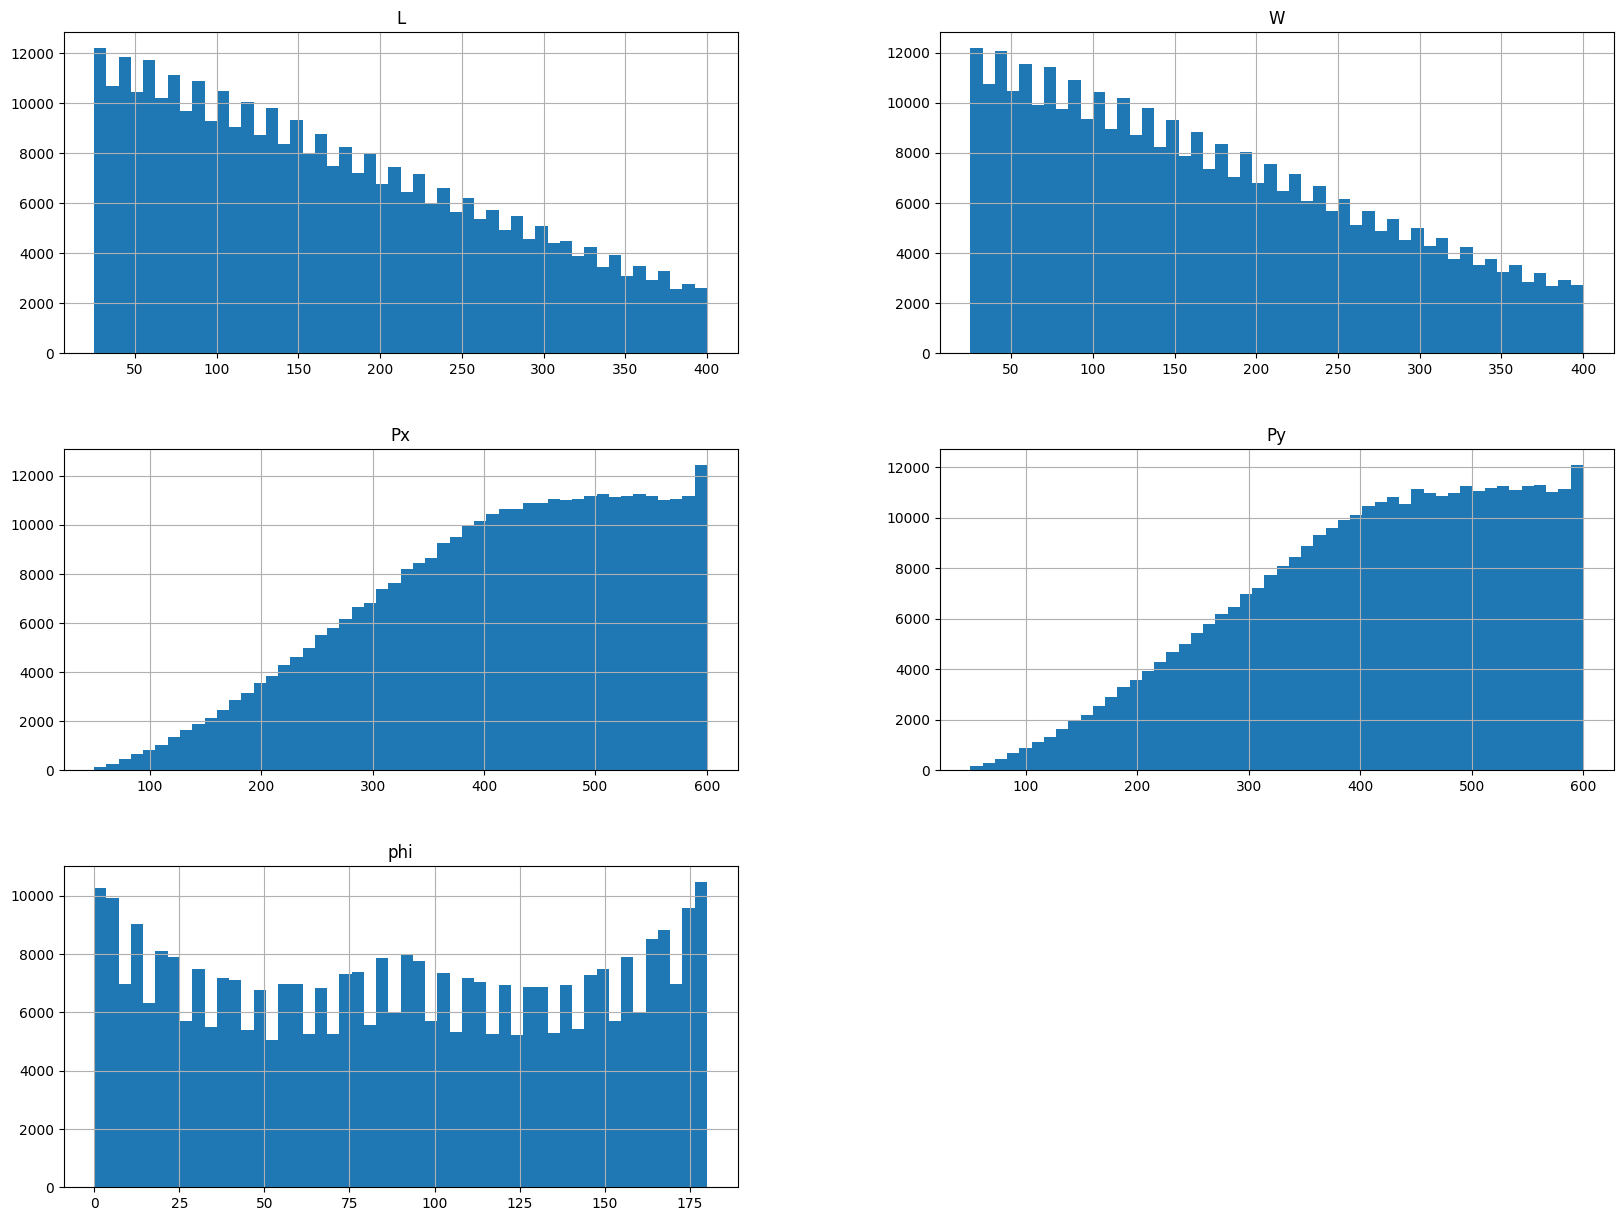

In [11]:
data_35w.hist(bins=50, figsize=(20, 15))


In [12]:
data_35w.insert(0, 'Pic', None)
data_35w.insert(0, 'type', "rec")

In [13]:
# 将索引重置为从0开始的连续整数
data_35w.reset_index(drop=True, inplace=True)
data_35w

,type,Pic,L,W,Px,Py,phi
0,rec,None,213,249,410,547,48
1,rec,None,385,329,544,520,125
2,rec,None,204,34,474,434,5
3,rec,None,95,319,517,578,53
4,rec,None,59,86,407,354,49
...,...,...,...,...,...,...,...
349995,rec,None,167,25,291,244,57
349996,rec,None,190,215,264,300,167
349997,rec,None,245,267,462,466,9
349998,rec,None,27,109,91,180,7


In [16]:
from tqdm import tqdm
for i in tqdm(range(len(data_35w))):
    W = data_35w.iloc[i]['W']
    L = data_35w.iloc[i]['L']
    Px = data_35w.iloc[i]['Px']
    Py = data_35w.iloc[i]['Py']
    phi = data_35w.iloc[i]['phi']
    pic_name = f'W={W}=L={L}=phi={phi}=Px={Px}=Py={Py}.png'
    data_35w.loc[i,"Pic"] = pic_name

100%|██████████| 350000/350000 [01:01<00:00, 5718.53it/s]


In [19]:
data_35w

,type,Pic,L,W,Px,Py,phi
0,rec,W=249=L=213=phi=48=Px=410=Py=547.png,213,249,410,547,48
1,rec,W=329=L=385=phi=125=Px=544=Py=520.png,385,329,544,520,125
2,rec,W=34=L=204=phi=5=Px=474=Py=434.png,204,34,474,434,5
3,rec,W=319=L=95=phi=53=Px=517=Py=578.png,95,319,517,578,53
4,rec,W=86=L=59=phi=49=Px=407=Py=354.png,59,86,407,354,49
...,...,...,...,...,...,...,...
349995,rec,W=25=L=167=phi=57=Px=291=Py=244.png,167,25,291,244,57
349996,rec,W=215=L=190=phi=167=Px=264=Py=300.png,190,215,264,300,167
349997,rec,W=267=L=245=phi=9=Px=462=Py=466.png,245,267,462,466,9
349998,rec,W=109=L=27=phi=7=Px=91=Py=180.png,27,109,91,180,7


In [20]:
data_35w.to_csv('rec_35w.csv', index=False)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
import numpy as np
import matplotlib.transforms as transforms
# import cv2
import math
from tqdm import tqdm


In [3]:
data = pd.read_csv('rec_35w.csv')
data

C:\Users\Kieron-Yee\AppData\Local\Temp\ipykernel_21468\27416238.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('rec_35w.csv')


,type,Pic,L,W,Px,Py,phi
0,double_rec,NaN,213.0,249.0,410.0,547.0,48.0
1,double_rec,NaN,385.0,329.0,544.0,520.0,125.0
2,double_rec,"W=25.0=L=85.0=""phi=7.0=Px=159.0=Py=480.0.png",204.0,34.0,474.0,434.0,5.0
3,double_rec,NaN,95.0,319.0,517.0,578.0,53.0
4,double_rec,NaN,59.0,86.0,407.0,354.0,49.0
...,...,...,...,...,...,...,...
756367,NaN,"W=nan=L=nan=""phi=nan=Px=nan=Py=nan.png",NaN,NaN,NaN,NaN,NaN
756368,NaN,"W=nan=L=nan=""phi=nan=Px=nan=Py=nan.png",NaN,NaN,NaN,NaN,NaN
756369,NaN,"W=nan=L=nan=""phi=nan=Px=nan=Py=nan.png",NaN,NaN,NaN,NaN,NaN
756370,NaN,"W=nan=L=nan=""phi=nan=Px=nan=Py=nan.png",NaN,NaN,NaN,NaN,NaN
